Coursera project for Classification 
AU:Ozgur Gulari

Objective:
The main objective of my project is to focus on predicting. 
Based on the given information define if the wine is good or not. 

Dependent variable : column good(boolean: 1 as True
                                          0 as False)
                                          


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Scaler
from sklearn.preprocessing import StandardScaler
# For holdout
from sklearn.model_selection import train_test_split, GridSearchCV
# For logit
from sklearn.linear_model import LogisticRegression
# For Random Forest
from sklearn.ensemble import RandomForestClassifier
#for using Decision Tree Algoithm
from sklearn.tree import DecisionTreeClassifier 
#for Support Vector Machine (SVM) Algorithm
from sklearn import svm  
# for K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier  
# For additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report



import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress = True, formatter = {'float_kind':'{:f}'.format})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Read Data
# DATA source : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/

wine_data = pd.read_csv('winequality_red.csv')

In [3]:
# Describe the data
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.000,8.320,1.741,4.600,7.100,7.900,9.200,15.900
volatile_acidity,1599.000,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric_acid,1599.000,0.271,0.195,0.000,0.090,0.260,0.420,1.000
residual_sugar,1599.000,2.539,1.410,0.900,1.900,2.200,2.600,15.500
chlorides,1599.000,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free_sulfur_dioxide,1599.000,15.875,10.460,1.000,7.000,14.000,21.000,72.000
total_sulfur_dioxide,1599.000,46.468,32.895,6.000,22.000,38.000,62.000,289.000
density,1599.000,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1599.000,3.311,0.154,2.740,3.210,3.310,3.400,4.010
sulphates,1599.000,0.658,0.170,0.330,0.550,0.620,0.730,2.000


EDA:
1 - Check missing Values 
2 - Check dtypes to see if we need to encode anything.
3 - Check if we have any columns that are only contains one value. 
4 - Correlation Matrix and Heatmap for checking the relationship between dep and indep vars. 
5 - Check outliers.

In [4]:
# Check missing Values
missing = [x for x in wine_data.columns if wine_data[x].isnull().sum() > 0]

if len(missing):
    print(f'Missings Found for \n{missing}')
else:
    print('No missings Found in the data!')

No missings Found in the data!


In [5]:
# 2 - Check dtypes to see if we need to encode anything. 

non_numeric_cols = wine_data.select_dtypes(exclude=[np.number]).columns.to_list()
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns.to_list()
if non_numeric_cols:
    print(f'Columns needs to be encoded {non_numeric_cols}')
else:
    print('All columns are numeric')

All columns are numeric


In [6]:
# Check if we have any columns that are only contains constant_value. 

constant_value_lst = [x for x in wine_data.columns if wine_data[x].nunique() <= 1]
if constant_value_lst:
    print(f'Constant column lst {constant_value_lst}')
else:
    print('No columns are constant')

No columns are constant


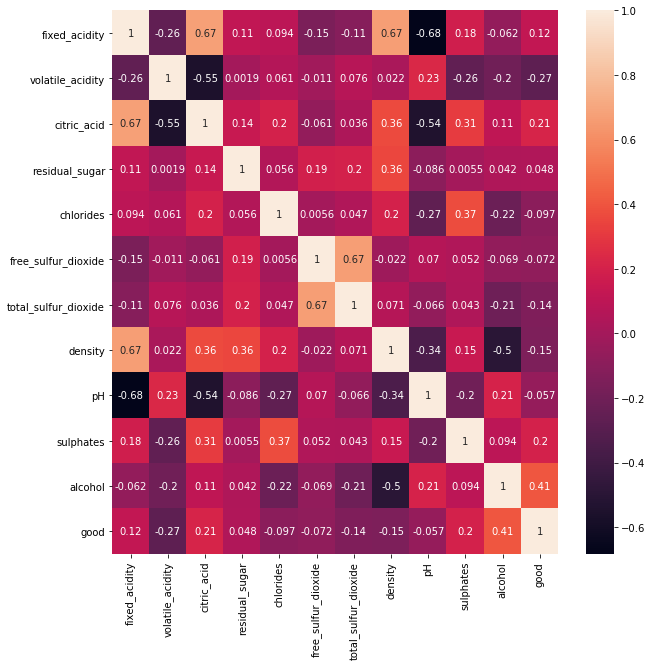

In [7]:
# 4 - Correlation Matrix and Heatmap for checking the relationship between dep and indep vars. 
correlation = wine_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

In [8]:
# 5 - Check outliers. and check the ratio of Good wines to not
ratio = wine_data.loc[wine_data['good'] == 1, 'good'].count() / len(wine_data['good'])
count = wine_data.loc[wine_data['good'] == 1, 'good'].count()
print(f'Before outlier handling Ratio of good wine count in the data {ratio} and count {count}')

# Ratio is a bit low, we can consider about oversampling or undersampling

# IQR (Interquartile Range) Method for outliers.

# 

Before outlier handling Ratio of good wine count in the data 0.1357098186366479 and count 217


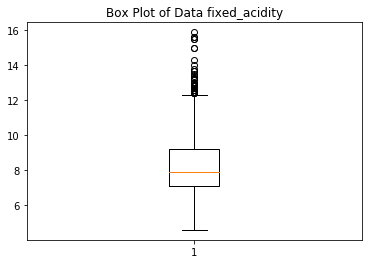

Outliers for fixed_acidity: []


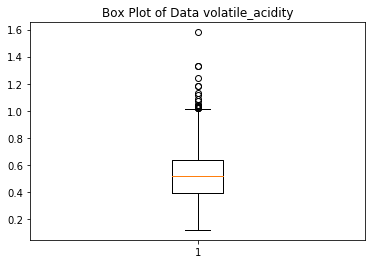

Outliers for volatile_acidity: []


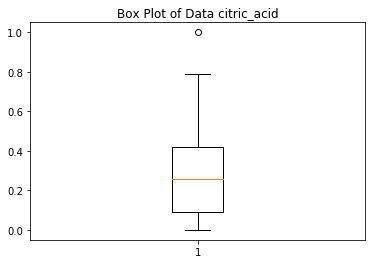

Outliers for citric_acid: []


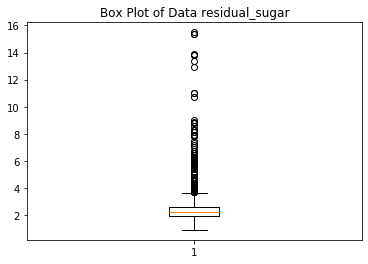

Outliers for residual_sugar: [10.7, 11.0, 11.0, 15.5, 12.9, 13.4, 15.4, 15.4, 13.8, 13.8, 13.9]
Outliers deleted


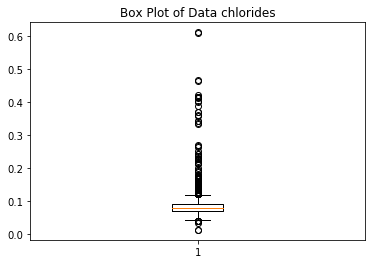

Outliers for chlorides: [0.358, 0.368, 0.341, 0.332, 0.464, 0.401, 0.467, 0.236, 0.61, 0.36, 0.27, 0.337, 0.263, 0.611, 0.343, 0.413, 0.25, 0.422, 0.387, 0.415, 0.243, 0.241, 0.414, 0.369, 0.403, 0.414, 0.415, 0.415, 0.267, 0.235, 0.23]
Outliers deleted


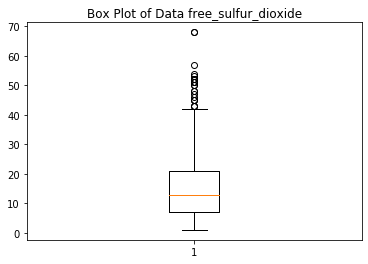

Outliers for free_sulfur_dioxide: []


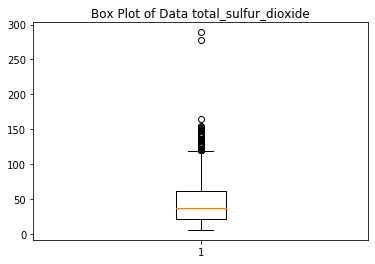

Outliers for total_sulfur_dioxide: [278.0, 289.0]
Outliers deleted


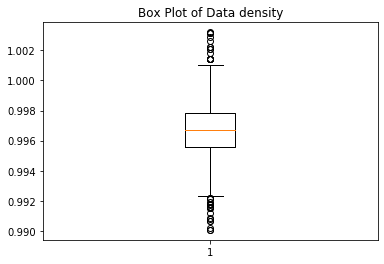

Outliers for density: []


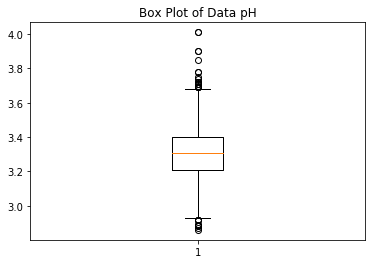

Outliers for pH: []


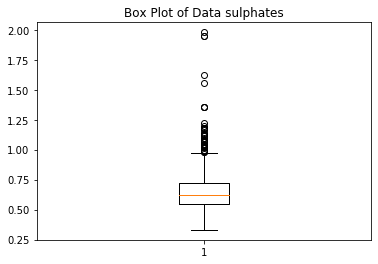

Outliers for sulphates: [1.95, 1.95, 1.98, 1.62]
Outliers deleted


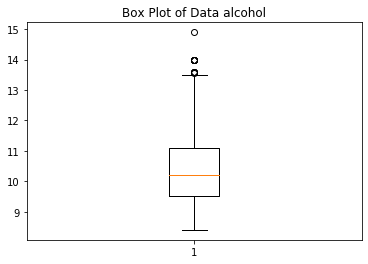

Outliers for alcohol: []



In [9]:
# Create a box plot to visualize the data

for cols in wine_data.columns:
    # no need to check dep var
    if cols == 'good':
        continue
    plt.boxplot(wine_data[cols])
    plt.title(f'Box Plot of Data {cols}')
    plt.show()

    # Calculate the IQR and identify outliers
    Q1 = np.percentile(wine_data[cols], 5)
    Q3 = np.percentile(wine_data[cols], 95)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = [x for x in wine_data[cols] if x < lower_bound or x > upper_bound]
    print(f"Outliers for {cols}: {outliers}")
    if outliers:
        wine_data = wine_data[(wine_data[cols] >= lower_bound) & (wine_data[cols] <= upper_bound)]
        print('Outliers deleted')
        
print()

In [10]:
# 5 - Check outliers. and check the ratio of Good wines to not
ratio = wine_data.loc[wine_data['good'] == 1, 'good'].count() / len(wine_data['good'])
count = wine_data.loc[wine_data['good'] == 1, 'good'].count()
print(f'After outlier handling Ratio of good wine count in the data {ratio} and count {count}')

# Ratio is a bit low, we can consider about oversampling or undersampling


After outlier handling Ratio of good wine count in the data 0.13797549967762734 and count 214


In [11]:
# the target column (in this case 'good') should not be included in variables
# Categorical variables may or maynot be added if any
columns = [x for x in wine_data.columns if x!='good']
variables = wine_data[columns]

# The constant term represents the intercept in a linear regression model.
# It's added because VIF calculations assume that a linear regression is performed.
x = add_constant(variables)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif
# if any of them were higher than 10 I would delete it to prevent multicollinearity (not the constant)

,VIF,features
0,1851878.904,const
1,8.048,fixed_acidity
2,1.830,volatile_acidity
3,3.129,citric_acid
4,1.659,residual_sugar
5,1.211,chlorides
6,2.007,free_sulfur_dioxide
7,2.232,total_sulfur_dioxide
8,6.685,density
9,3.266,pH


In [12]:
"""

Now the modeling part
Logistic Regression is used with grid search to find best hyperparameters.

"""
# Now we need to scale the data, I'm going to use standard scaler. z transformation
# Dep_Var
x = wine_data.drop('good', axis =1)

# indep_var
y = wine_data['good']

scaler = StandardScaler()

scaler.fit(x)
scaled_x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.3, random_state  = 999)


Best Hyperparameters: {'C': 0.5, 'l1_ratio': 0.2, 'penalty': 'l2'}
Test accuracy: 0.8626609442060086


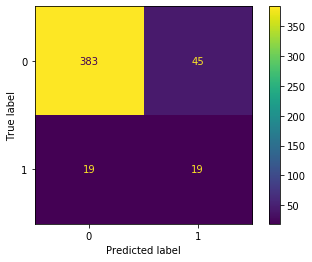

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       402
           1       0.50      0.30      0.37        64

    accuracy                           0.86       466
   macro avg       0.70      0.62      0.65       466
weighted avg       0.84      0.86      0.85       466



In [13]:
# Create regression instance, saga solver because l1 and l2 support.
log_reg = LogisticRegression(solver='saga') 

# Define a grid of hyperparameters to search
# # Regularization type and C hyperparameter
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator = log_reg, param_grid = parameters, scoring = 'roc_auc', cv=5, verbose=0)
grid_search.fit(x_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model with the best hyperparameters on the training data
log_Reg2 = LogisticRegression(**best_params)
log_Reg2.fit(x_train, y_train)

# Evaluate the model on the test data
test_accuracy = log_Reg2.score(x_test, y_test)
print("Test accuracy:", test_accuracy)

## reviewing the results
cv_results = pd.DataFrame(grid_search.cv_results_)

y_pred_logit = log_Reg2.predict(x_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred_logit, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_Reg2.classes_)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_logit))

In [14]:
log_Reg2.intercept_

array([-2.941034])

In [17]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\gulaoz01\.conda\envs\local_spark_env\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.1.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.20.2
        scipy: 1.6.2
       Cython: None
       pandas: 1.2.4
   matplotlib: 3.1.3
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


In [ ]:
# F1-score
f1 = f1_score(y_test, y_pred_logit)
print("F1-Score:", f1)

# ROC-AUC Score
y_probs = log_Reg2.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_probs[:, 1])
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc_curve = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_dtree = dtree.predict(x_test)
acc_dtree_1 = accuracy_score(y_pred_dtree, y_test)
print(acc_dtree_1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred_dtree, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtree.classes_)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_dtree))

In [ ]:
# Random Forest
r_forest = RandomForestClassifier(n_estimators=100)
# we train the algorithm with the training data and the training output
r_forest.fit(x_train,y_train)
# now we pass the testing data to the trained algorithm
y_pred_rf = r_forest.predict(x_test)
# Calc Accuracy
acc_rf = accuracy_score(y_pred_rf, y_test)
print(acc_rf)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred_rf, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=r_forest.classes_)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_rf))

In [ ]:
#select the algorithm
sv = svm.SVC() 
# we train the algorithm with the training data and the training output
sv.fit(x_train,y_train) 
# now we pass the testing data to the trained algorithm
y_pred_svm = sv.predict(x_test) 
# Calc Accuracy
acc_svm = accuracy_score(y_pred_svm, y_test)
print(acc_svm)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred_svm, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sv.classes_)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_svm))

In [ ]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
acc_knc = accuracy_score(y_pred_knc, y_test)
print(acc_knc)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred_svm, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knc.classes_)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_knc))

In [ ]:
# Simple Random forest

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred_rfc, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfc.classes_)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_rfc))

In [ ]:
#ensemble methods

rfc = RandomForestClassifier(n_estimators=200)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
rfc_tuned = grid_search.best_estimator_

y_pred_rfc_tuned = rfc_tuned.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred_rfc_tuned, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfc_tuned.classes_)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_rfc_tuned))

In [ ]:
# After comparison to some other models, LogisticRegression still gives us the highest (~92%)

In [ ]:
# ensemble them together

